# 1-bayes-测试集训练集划分

(400, 3)
(400, 2)
(400,)
0.99
[0. 3. 3. 2. 1. 3. 3. 1. 1. 3. 2. 2. 0. 1. 1. 2. 0. 0. 1. 0. 2. 1. 0. 1.
 2. 2. 3. 0. 3. 1. 3. 0. 2. 0. 3. 0. 2. 1. 3. 2. 2. 2. 0. 2. 2. 1. 1. 3.
 1. 2. 2. 3. 0. 0. 0. 1. 2. 0. 0. 3. 0. 2. 1. 2. 3. 1. 3. 1. 0. 1. 0. 1.
 2. 2. 3. 0. 3. 3. 1. 1. 1. 1. 3. 1. 3. 3. 0. 1. 3. 2. 3. 3. 1. 2. 2. 0.
 3. 1. 1. 2.]
[0. 3. 3. 2. 1. 3. 3. 1. 1. 3. 2. 2. 0. 1. 1. 2. 0. 0. 1. 0. 2. 1. 0. 1.
 2. 2. 3. 0. 3. 1. 3. 0. 2. 0. 3. 0. 2. 1. 3. 2. 2. 2. 0. 2. 2. 1. 1. 3.
 1. 2. 2. 3. 0. 0. 0. 1. 2. 0. 0. 3. 0. 2. 1. 2. 3. 2. 3. 1. 0. 1. 0. 1.
 2. 2. 3. 0. 3. 3. 1. 1. 1. 1. 3. 1. 3. 3. 0. 1. 3. 2. 3. 3. 1. 2. 2. 0.
 3. 1. 1. 2.]


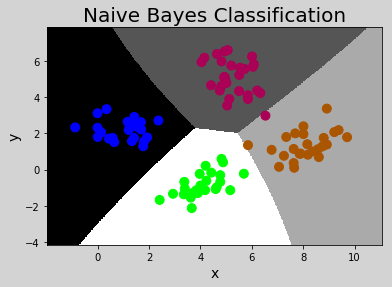

In [18]:

import numpy as np
import sklearn.naive_bayes as nb
import matplotlib.pyplot as mp
import sklearn.model_selection as sm
                                                    #不拆包
data = np.loadtxt('./data/ml_data/multiple1.txt', unpack=False, dtype='U20', delimiter=',')
print(data.shape)
#所有行的前两列
x = np.array(data[:, :-1], dtype=float)
print(x.shape)
#所有行的最后一列
y = np.array(data[:, -1], dtype=float)
print(y.shape)

#拆分训练集与测试集
train_x,test_x,train_y,test_y=sm.train_test_split(x,y,test_size=0.25,random_state=7)



# 创建高斯分布朴素贝叶斯分类器
model = nb.GaussianNB()
#训练
model.fit(train_x, train_y)

#计算模型预测准确度
pred_test_y=model.predict(test_x)
ac=(test_y==pred_test_y).sum()/test_y.size
print(ac)
print(test_y)
print(pred_test_y)




#拆分
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
#把总体切成500份
n = 500

#绘制分类边界线
grid_x, grid_y = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
samples = np.column_stack((grid_x.ravel(), grid_y.ravel()))
grid_z = model.predict(samples)
#变维(改变成二位矩阵)
grid_z = grid_z.reshape(grid_x.shape)

mp.figure('Naive Bayes Classification', facecolor='lightgray')
mp.title('Naive Bayes Classification', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x, grid_y, grid_z, cmap='gray')
mp.scatter(test_x[:, 0], test_x[:, 1], c=test_y, cmap='brg', s=80)
mp.show()

# 2-cv-交叉严重验证

[1.         1.         1.         1.         0.98305085]
0.99
[0. 3. 3. 2. 1. 3. 3. 1. 1. 3. 2. 2. 0. 1. 1. 2. 0. 0. 1. 0. 2. 1. 0. 1.
 2. 2. 3. 0. 3. 1. 3. 0. 2. 0. 3. 0. 2. 1. 3. 2. 2. 2. 0. 2. 2. 1. 1. 3.
 1. 2. 2. 3. 0. 0. 0. 1. 2. 0. 0. 3. 0. 2. 1. 2. 3. 1. 3. 1. 0. 1. 0. 1.
 2. 2. 3. 0. 3. 3. 1. 1. 1. 1. 3. 1. 3. 3. 0. 1. 3. 2. 3. 3. 1. 2. 2. 0.
 3. 1. 1. 2.]
[0. 3. 3. 2. 1. 3. 3. 1. 1. 3. 2. 2. 0. 1. 1. 2. 0. 0. 1. 0. 2. 1. 0. 1.
 2. 2. 3. 0. 3. 1. 3. 0. 2. 0. 3. 0. 2. 1. 3. 2. 2. 2. 0. 2. 2. 1. 1. 3.
 1. 2. 2. 3. 0. 0. 0. 1. 2. 0. 0. 3. 0. 2. 1. 2. 3. 2. 3. 1. 0. 1. 0. 1.
 2. 2. 3. 0. 3. 3. 1. 1. 1. 1. 3. 1. 3. 3. 0. 1. 3. 2. 3. 3. 1. 2. 2. 0.
 3. 1. 1. 2.]
0.9966101694915255
0.996822033898305
0.9966101694915255
0.9966063988235516


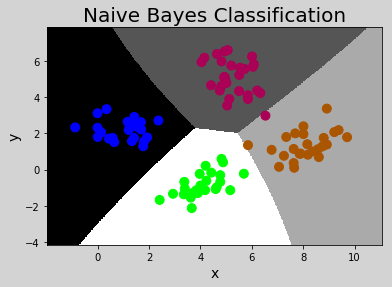

In [21]:

import numpy as np
import sklearn.naive_bayes as nb
import matplotlib.pyplot as mp
import sklearn.model_selection as ms
#不拆包
data = np.loadtxt('./data/ml_data/multiple1.txt', unpack=False, dtype='U20', delimiter=',')
# print(data.shape)
#所有行的前两列
x = np.array(data[:, :-1], dtype=float)
# print(x.shape)
#所有行的最后一列
y = np.array(data[:, -1], dtype=float)
# print(y.shape)

#拆分训练集与测试集
train_x,test_x,train_y,test_y=ms.train_test_split(x,y,test_size=0.25,random_state=7)

# 创建高斯分布朴素贝叶斯分类器
model = nb.GaussianNB()
sc=ms.cross_val_score(model,train_x,train_y,cv=5,scoring='accuracy')
print(sc)
# print(sc.mean())
#训练
model.fit(train_x, train_y)

#计算模型预测准确度
pred_test_y=model.predict(test_x)
ac=(test_y==pred_test_y).sum()/test_y.size
print(ac)
print(test_y)
print(pred_test_y)

# 交叉验证
# 精确度
ac = ms.cross_val_score( model, train_x, train_y, cv=5, scoring='accuracy')
print(ac.mean())
# 查准率
pw = ms.cross_val_score( model, train_x, train_y, cv=5, scoring='precision_weighted')
print(pw.mean())
# 召回率
rw = ms.cross_val_score( model, train_x, train_y, cv=5, scoring='recall_weighted')
print(rw.mean())
# f1得分
fw = ms.cross_val_score( model, train_x, train_y, cv=5, scoring='f1_weighted')
print(fw.mean())


#拆分
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
#把总体切成500份
n = 500

#绘制分类边界线
grid_x, grid_y = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
samples = np.column_stack((grid_x.ravel(), grid_y.ravel()))
grid_z = model.predict(samples)
#变维(改变成二位矩阵)
grid_z = grid_z.reshape(grid_x.shape)

mp.figure('Naive Bayes Classification', facecolor='lightgray')
mp.title('Naive Bayes Classification', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x, grid_y, grid_z, cmap='gray')
mp.scatter(test_x[:, 0], test_x[:, 1], c=test_y, cmap='brg', s=80)
mp.show()

# 3-cm-混淆矩阵

(400, 3)
(400, 2)
(400,)
0.9966101694915255
[[22  0  0  0]
 [ 0 27  1  0]
 [ 0  0 25  0]
 [ 0  0  0 25]]


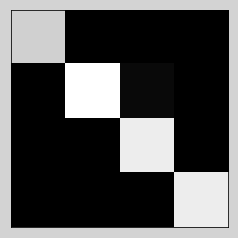

In [22]:
import numpy as np
import sklearn.naive_bayes as nb
import matplotlib.pyplot as mp

import sklearn.model_selection as ms
import sklearn.metrics as sm


#不拆包
data = np.loadtxt('./data/ml_data/multiple1.txt', unpack=False, dtype='U20', delimiter=',')
print(data.shape)
#所有行的前两列
x = np.array(data[:, :-1], dtype=float)
print(x.shape)
#所有行的最后一列
y = np.array(data[:, -1], dtype=float)
print(y.shape)

#拆分训练集与测试集
train_x,test_x,train_y,test_y=ms.train_test_split(x,y,test_size=0.25,random_state=7)

# 创建高斯分布朴素贝叶斯分类器
model = nb.GaussianNB()
sc=ms.cross_val_score(model,train_x,train_y,cv=5,scoring='accuracy')
print(sc.mean())
#训练
model.fit(train_x, train_y)

#计算模型预测准确度
pred_test_y=model.predict(test_x)

#输出混淆矩阵
cm=sm.confusion_matrix(test_y,pred_test_y)
print(cm)

mp.figure('Confusion Matrix',facecolor='lightgray')
mp.xticks([])
mp.yticks([])
mp.imshow(cm,cmap='gray')

#拆分
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
#把总体切成500份
n = 500

#绘制分类边界线
grid_x, grid_y = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
samples = np.column_stack((grid_x.ravel(), grid_y.ravel()))
grid_z = model.predict(samples)
#变维(改变成二位矩阵)
grid_z = grid_z.reshape(grid_x.shape)

# mp.figure('Naive Bayes Classification', facecolor='lightgray')
# mp.title('Naive Bayes Classification', fontsize=20)
# mp.xlabel('x', fontsize=14)
# mp.ylabel('y', fontsize=14)
# mp.tick_params(labelsize=10)
# mp.pcolormesh(grid_x, grid_y, grid_z, cmap='gray')
# mp.scatter(test_x[:, 0], test_x[:, 1], c=test_y, cmap='brg', s=80)
mp.show()

# 4-cr-分类报告

In [24]:

import numpy as np
import sklearn.naive_bayes as nb
import matplotlib.pyplot as mp

import sklearn.model_selection as ms
import sklearn.metrics as sm


#不拆包
data = np.loadtxt('./data/ml_data/multiple1.txt', unpack=False, dtype='U20', delimiter=',')
print(data.shape)
#所有行的前两列
x = np.array(data[:, :-1], dtype=float)
print(x.shape)
#所有行的最后一列
y = np.array(data[:, -1], dtype=float)
print(y.shape)

#拆分训练集与测试集
train_x,test_x,train_y,test_y=ms.train_test_split(x,y,test_size=0.25,random_state=7)



# 创建高斯分布朴素贝叶斯分类器
model = nb.GaussianNB()
sc=ms.cross_val_score(model,train_x,train_y,cv=5,scoring='accuracy')
print(sc.mean())
#训练
model.fit(train_x, train_y)

#计算模型预测准确度
pred_test_y=model.predict(test_x)

#输出分类报告
cr=sm.classification_report(test_y,pred_test_y)
print(cr)


#拆分
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
#把总体切成500份
n = 500

#绘制分类边界线
grid_x, grid_y = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
samples = np.column_stack((grid_x.ravel(), grid_y.ravel()))
grid_z = model.predict(samples)
#变维(改变成二位矩阵)
grid_z = grid_z.reshape(grid_x.shape)

# mp.figure('Naive Bayes Classification', facecolor='lightgray')
# mp.title('Naive Bayes Classification', fontsize=20)
# mp.xlabel('x', fontsize=14)
# mp.ylabel('y', fontsize=14)
# mp.tick_params(labelsize=10)
# mp.pcolormesh(grid_x, grid_y, grid_z, cmap='gray')
# mp.scatter(test_x[:, 0], test_x[:, 1], c=test_y, cmap='brg', s=80)
mp.show()

(400, 3)
(400, 2)
(400,)
0.9966101694915255
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        22
         1.0       1.00      0.96      0.98        28
         2.0       0.96      1.00      0.98        25
         3.0       1.00      1.00      1.00        25

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



# 5-car-小汽车评级

In [26]:
import numpy as np
import sklearn.preprocessing as sp
import sklearn.ensemble as se
import sklearn.model_selection as ms

data=np.loadtxt('./data/ml_data/car.txt',delimiter=',',unpack=False,dtype='U10')
print(data.shape)

data=data.T
train_x,train_y=[],[]
encoders=[]
for row in range(len(data)):
    encoder=sp.LabelEncoder()
    if row <len(data)-1:        #读取到一列输入数据
        train_x.append(encoder.fit_transform(data[row]))
    else:
        train_y=encoder.fit_transform(data[row])
    encoders.append(encoder)


train_x=np.array(train_x).T
train_y=np.array(train_y)
print(train_x.shape,train_y.shape)

#准备随机森林分类器 ，训练分类模型
model=se.RandomForestClassifier(max_depth=6,n_estimators=200,random_state=7)

#交叉验证看模型效果
cv_score=ms.cross_val_score(model,train_x,train_y,cv=5,scoring='f1_weighted')
print(cv_score.mean())


#训练模型
model.fit(train_x,train_y)

data = [
    ['high', 'med', '5more', '4', 'big', 'low', 'unacc'],
    ['high', 'high', '4', '4', 'med', 'med', 'acc'],
    ['low', 'low', '2', '4', 'small', 'high', 'good'],
    ['low', 'med', '3', '4', 'med', 'high', 'vgood']]

#整理测试数据的输入集与输出集
data=np.array(data).T
test_x,test_y=[],[]
for row in range(len(data)):
    encoder=encoders[row]
    if row < len(data)-1:

        #从encoders列表中那拿到当时训练好的编码器
        test_x.append(encoder.transform(data[row]))
    else:
        test_y=encoder.transform(data[row])

test_x=np.array(test_x).T               #转置（行变列）
test_y=np.array(test_y)
#针对测试集，使用训练好的模型预测输出
pred_test_y=model.predict(test_x)
print(encoders[-1].inverse_transform(test_y))
print(encoders[-1].inverse_transform(pred_test_y))

(1728, 7)
(1728, 6) (1728,)


/home/tarena/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/tarena/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/tarena/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.754229010800764
['unacc' 'acc' 'good' 'vgood']
['unacc' 'acc' 'acc' 'vgood']


# 6-vc-验证曲线

(1728, 7)
(1728, 6) (1728,)
[0.70659363 0.73320675 0.73611709 0.76101963 0.7853811  0.78136846
 0.78428552 0.79872631 0.79062374]


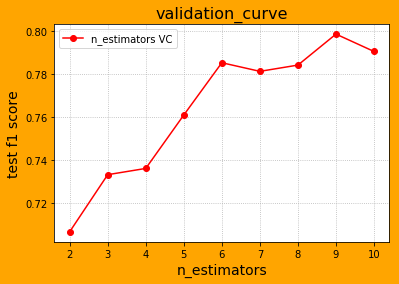

['unacc' 'acc' 'good' 'vgood']
['unacc' 'acc' 'acc' 'vgood']


In [28]:

import numpy as np
import sklearn.preprocessing as sp
import sklearn.ensemble as se
import sklearn.model_selection as ms
import matplotlib.pyplot as mp

data=np.loadtxt('./data/ml_data/car.txt',delimiter=',',unpack=False,dtype='U10')
print(data.shape)

data=data.T
train_x,train_y=[],[]
encoders=[]
for row in range(len(data)):
    encoder=sp.LabelEncoder()
    if row <len(data)-1:        #读取到一列输入数据
        train_x.append(encoder.fit_transform(data[row]))
    else:
        train_y=encoder.fit_transform(data[row])
    encoders.append(encoder)


train_x=np.array(train_x).T
train_y=np.array(train_y)
print(train_x.shape,train_y.shape)

#准备随机森林分类器 ，训练分类模型
model=se.RandomForestClassifier(max_depth=6,n_estimators=200,random_state=7)

# #基于验证曲线，选择最优超参数
# x=np.arange(100,200,20)
# train_scores,test_scores=ms.validation_curve(model,train_x,train_y,'n_estimators',np.arange(100,200,20),cv=5)
# print(test_scores.mean(axis=1))
#
#绘制验证曲线模型
# mp.figure('validation_curve',facecolor='orange')
# mp.title('validation_curve',fontsize=16)
# mp.grid(linestyle=':')
# mp.xlabel('n_estimators',fontsize=14)
# mp.ylabel('test f1 score',fontsize=14)
#
# y=test_scores.mean(axis=1)
# mp.plot(x,y,'o-',color='blue',label='n_estimators VC')
# mp.legend()
# mp.show()

#基于验证曲线，选择最优max_depth参数
x=np.arange(2,11)
train_scores,test_scores=ms.validation_curve(model,train_x,train_y,'max_depth',x,cv=5)
print(test_scores.mean(axis=1))

#绘制验证曲线模型
mp.figure('validation_curve',facecolor='orange')
mp.title('validation_curve',fontsize=16)
mp.grid(linestyle=':')
mp.xlabel('n_estimators',fontsize=14)
mp.ylabel('test f1 score',fontsize=14)

y=test_scores.mean(axis=1)
mp.plot(x,y,'o-',color='red',label='n_estimators VC')
mp.legend()
mp.show()


#训练模型
model.fit(train_x,train_y)

data = [
    ['high', 'med', '5more', '4', 'big', 'low', 'unacc'],
    ['high', 'high', '4', '4', 'med', 'med', 'acc'],
    ['low', 'low', '2', '4', 'small', 'high', 'good'],
    ['low', 'med', '3', '4', 'med', 'high', 'vgood']]

#整理测试数据的输入集与输出集
data=np.array(data).T               #转置（行变列）
test_x,test_y=[],[]
for row in range(len(data)):
    encoder=encoders[row]
    if row < len(data)-1:
        #从encoders列表中那拿到当时训练好的编码器
        test_x.append(encoder.transform(data[row]))
    else:
        test_y=encoder.transform(data[row])

test_x=np.array(test_x).T
test_y=np.array(test_y)
#针对测试集，使用训练好的模型预测输出
pred_test_y=model.predict(test_x)
print(encoders[-1].inverse_transform(test_y))
print(encoders[-1].inverse_transform(pred_test_y))

# 7-lc-学习曲线

(1728, 7)
(1728, 6) (1728,)


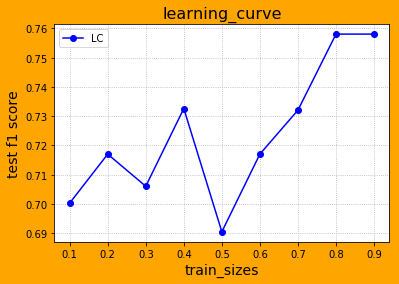

['unacc' 'acc' 'good' 'vgood']
['unacc' 'unacc' 'acc' 'acc']


In [30]:

#确定训练集大小

import numpy as np
import sklearn.preprocessing as sp
import sklearn.ensemble as se
import sklearn.model_selection as ms
import matplotlib.pyplot as mp

data=np.loadtxt('./data/ml_data/car.txt',delimiter=',',unpack=False,dtype='U10')
print(data.shape)

data=data.T
train_x,train_y=[],[]
encoders=[]
for row in range(len(data)):
    encoder=sp.LabelEncoder()
    if row <len(data)-1:        #读取到一列输入数据
        train_x.append(encoder.fit_transform(data[row]))
    else:
        train_y=encoder.fit_transform(data[row])
    encoders.append(encoder)


train_x=np.array(train_x).T
train_y=np.array(train_y)
print(train_x.shape,train_y.shape)

#准备随机森林分类器 ，训练分类模型
model=se.RandomForestClassifier(max_depth=5,n_estimators=200,random_state=7)

train_sizes=np.arange(0.1,1,0.1)
#学习曲线确定训练集大小
_,train_scores, test_scores=ms.learning_curve(model,train_x,train_y,train_sizes=train_sizes,cv=5)
# #绘制学习曲线模型
mp.figure('learning_curve',facecolor='orange')
mp.title('learning_curve',fontsize=16)
mp.grid(linestyle=':')
mp.xlabel('train_sizes',fontsize=14)
mp.ylabel('test f1 score',fontsize=14)

y=test_scores.mean(axis=1)
mp.plot(train_sizes,y,'o-',color='blue',label='LC')
mp.legend()
mp.show()



#训练模型
model.fit(train_x,train_y)

data = [
    ['high', 'med', '5more', '4', 'big', 'low', 'unacc'],
    ['high', 'high', '4', '4', 'med', 'med', 'acc'],
    ['low', 'low', '2', '4', 'small', 'high', 'good'],
    ['low', 'med', '3', '4', 'med', 'high', 'vgood']]

#整理测试数据的输入集与输出集
data=np.array(data).T               #转置（行变列）
test_x,test_y=[],[]
for row in range(len(data)):
    encoder=encoders[row]
    if row < len(data)-1:
        #从encoders列表中那拿到当时训练好的编码器
        test_x.append(encoder.transform(data[row]))
    else:
        test_y=encoder.transform(data[row])

test_x=np.array(test_x).T
test_y=np.array(test_y)
#针对测试集，使用训练好的模型预测输出
pred_test_y=model.predict(test_x)
print(encoders[-1].inverse_transform(test_y))
print(encoders[-1].inverse_transform(pred_test_y))

# 8-svm-linear-线性核函数

(300, 2) (300,)
              precision    recall  f1-score   support

         0.0       0.69      0.90      0.78        40
         1.0       0.83      0.54      0.66        35

    accuracy                           0.73        75
   macro avg       0.76      0.72      0.72        75
weighted avg       0.75      0.73      0.72        75



No handles with labels found to put in legend.


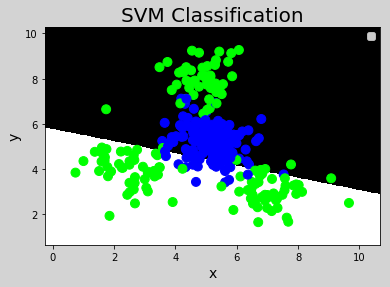

In [32]:
import numpy as np
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm
import matplotlib.pyplot as mp

data=np.loadtxt('./data/ml_data/multiple2.txt',delimiter=',',dtype='f8')
x=data[:,:-1]
y=data[:,-1]
print(x.shape,y.shape)

#拆分测试集与训练集
train_x,test_x,train_y,test_y=ms.train_test_split(x,y,test_size=0.25,random_state=7)
# print(train_x,test_x,train_y,test_y)
#训练svm训练器
model=svm.SVC(kernel='linear')
model.fit(train_x,train_y)
#预测
pre_test_y=model.predict(test_x)
#输出分类结果
cr=sm.classification_report(test_y,pre_test_y)
print(cr)


#拆分
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
#把总体切成500份
n = 500

#绘制分类边界线
grid_x, grid_y = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
samples = np.column_stack((grid_x.ravel(), grid_y.ravel()))
grid_z = model.predict(samples)
#变维(改变成二位矩阵)
grid_z = grid_z.reshape(grid_x.shape)

#绘制样本空间
mp.figure('SVM', facecolor='lightgray')
mp.title('SVM Classification', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x, grid_y, grid_z, cmap='gray')
mp.scatter(x[:, 0], x[:, 1], c=y, cmap='brg', s=80)
mp.legend()
mp.show()

# 9-svm-poly-多项式核函数

(300, 2) (300,)
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        40
         1.0       0.91      0.91      0.91        35

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75



/home/tarena/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
No handles with labels found to put in legend.


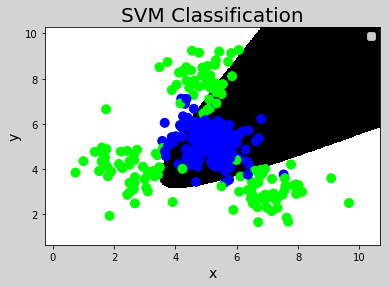

In [34]:
import numpy as np
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm
import matplotlib.pyplot as mp

data=np.loadtxt('./data/ml_data/multiple2.txt',delimiter=',',dtype='f8')
x=data[:,:-1]
y=data[:,-1]
print(x.shape,y.shape)

#拆分测试集与训练集
train_x,test_x,train_y,test_y=ms.train_test_split(x,y,test_size=0.25,random_state=7)
# print(train_x,test_x,train_y,test_y)
#训练svm训练器
model=svm.SVC(kernel='poly',degree=2)
model.fit(train_x,train_y)
#预测
pre_test_y=model.predict(test_x)
#输出分类结果
cr=sm.classification_report(test_y,pre_test_y)
print(cr)


#拆分
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
#把总体切成500份
n = 500

#绘制分类边界线
grid_x, grid_y = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
samples = np.column_stack((grid_x.ravel(), grid_y.ravel()))
grid_z = model.predict(samples)
#变维(改变成二位矩阵)
grid_z = grid_z.reshape(grid_x.shape)

#绘制样本空间
mp.figure('SVM', facecolor='lightgray')
mp.title('SVM Classification', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x, grid_y, grid_z, cmap='gray')
mp.scatter(x[:, 0], x[:, 1], c=y, cmap='brg', s=80)
mp.legend()
mp.show()

# 10-svm-rbf-径向基核函数

(300, 2) (300,)
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        40
         1.0       0.94      0.97      0.96        35

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



No handles with labels found to put in legend.


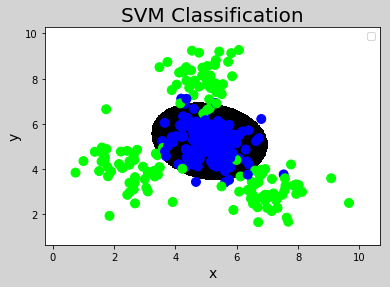

In [35]:
import numpy as np
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm
import matplotlib.pyplot as mp

data=np.loadtxt('./data/ml_data/multiple2.txt',delimiter=',',dtype='f8')
x=data[:,:-1]
y=data[:,-1]
print(x.shape,y.shape)

#拆分测试集与训练集
train_x,test_x,train_y,test_y=ms.train_test_split(x,y,test_size=0.25,random_state=7)
# print(train_x,test_x,train_y,test_y)
#训练svm训练器
model=svm.SVC(kernel='rbf',C=600,gamma=0.01)
model.fit(train_x,train_y)
#预测
pre_test_y=model.predict(test_x)
#输出分类结果
cr=sm.classification_report(test_y,pre_test_y)
print(cr)


#拆分
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
#把总体切成500份
n = 500

#绘制分类边界线
grid_x, grid_y = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
samples = np.column_stack((grid_x.ravel(), grid_y.ravel()))
grid_z = model.predict(samples)
#变维(改变成二位矩阵)
grid_z = grid_z.reshape(grid_x.shape)

#绘制样本空间
mp.figure('SVM', facecolor='lightgray')
mp.title('SVM Classification', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x, grid_y, grid_z, cmap='gray')
mp.scatter(x[:, 0], x[:, 1], c=y, cmap='brg', s=80)
mp.legend()
mp.show()

# 11-classweight-样本类别均衡化

(1200, 2) (1200,)


/home/tarena/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

         0.0       0.55      0.89      0.68        53
         1.0       0.97      0.84      0.90       247

    accuracy                           0.85       300
   macro avg       0.76      0.86      0.79       300
weighted avg       0.90      0.85      0.86       300



No handles with labels found to put in legend.


              precision    recall  f1-score   support

         0.0       0.55      0.89      0.68        53
         1.0       0.97      0.84      0.90       247

    accuracy                           0.85       300
   macro avg       0.76      0.86      0.79       300
weighted avg       0.90      0.85      0.86       300



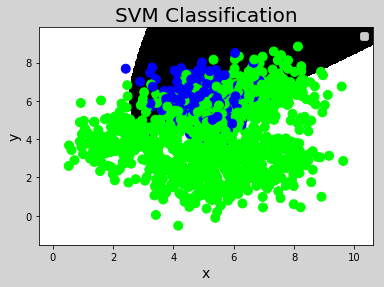

In [36]:
import numpy as np
import sklearn.model_selection as ms
import sklearn.svm as svm
import sklearn.metrics as sm
import matplotlib.pyplot as mp

data=np.loadtxt('./data/ml_data/imbalance.txt',delimiter=',',dtype='f8')
x=data[:,:-1]
y=data[:,-1]
print(x.shape,y.shape)

#拆分测试集与训练集
train_x,test_x,train_y,test_y=ms.train_test_split(x,y,test_size=0.25,random_state=7)
# print(train_x,test_x,train_y,test_y)
#训练svm训练器
model=svm.SVC(kernel='poly',class_weight='balanced')
model.fit(train_x,train_y)
#预测
pre_test_y=model.predict(test_x)
#输出分类结果class_weight='balanced'
cr=sm.classification_report(test_y,pre_test_y)
print(cr)


#拆分
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
#把总体切成500份
n = 500

#绘制分类边界线
grid_x, grid_y = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
samples = np.column_stack((grid_x.ravel(), grid_y.ravel()))
grid_z = model.predict(samples)
#变维(改变成二位矩阵)
grid_z = grid_z.reshape(grid_x.shape)
pred_test_y = model.predict(test_x)
cr = sm.classification_report(test_y, pred_test_y)
print(cr)

#绘制样本空间
mp.figure('SVM', facecolor='lightgray')
mp.title('SVM Classification', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x, grid_y, grid_z, cmap='gray')
mp.scatter(x[:, 0], x[:, 1], c=y, cmap='brg', s=80)
mp.legend()
mp.show()

# 预测工人工资收入

In [37]:
import  numpy as np
import sklearn.preprocessing as sp
import sklearn.naive_bayes as nb
import sklearn.model_selection as ms


class DigitEncoder():

    def fit_transform(self, y):
        return y.astype(int)

    def transform(self, y):
        return y.astype(int)

    def inverse_transform(self, y):
        return y.astype(str)


num_less, num_more, max_each = 0, 0, 7500
data = []

txt = np.loadtxt('./data/ml_data/adult.txt', dtype='U20', delimiter=', ')
for row in txt:
    if (' ?' in row):
        continue
    elif (str(row[-1]) == '<=50K'):
        num_less += 1
        data.append(row)
    elif (str(row[-1]) == '>50K'):
        num_more += 1
        data.append(row)

data = np.array(data).T
encoders, x = [], []
for row in range(len(data)):
    if str(data[row, 0]).isdigit():
        encoder = DigitEncoder()
    else:
        encoder = sp.LabelEncoder()
    if row < len(data) - 1:
        x.append(encoder.fit_transform(data[row]))
    else:
        y = encoder.fit_transform(data[row])
    encoders.append(encoder)

x = np.array(x).T
train_x, test_x, train_y, test_y = ms.train_test_split(
    x, y, test_size=0.25, random_state=5)
model = nb.GaussianNB()
print(ms.cross_val_score(
    model, x, y, cv=10, scoring='f1_weighted').mean())
model.fit(train_x, train_y)
pred_test_y = model.predict(test_x)
print((pred_test_y == test_y).sum() / pred_test_y.size)

data = [['39', 'State-gov', '77516', 'Bachelors',
         '13', 'Never-married', 'Adm-clerical', 'Not-in-family',
         'White', 'Male', '2174', '0', '40', 'United-States']]
data = np.array(data).T
x = []
for row in range(len(data)):
    encoder = encoders[row]
    x.append(encoder.transform(data[row]))
x = np.array(x).T
pred_y = model.predict(x)
print(encoders[-1].inverse_transform(pred_y))

0.7663764546842204
0.7903205994349588
['<=50K']
